# Decision Tree :

***Problem statement :***
- Use decision trees to prepare a model on fraud data 
  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

***Data Description :***
- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the     government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not


In [34]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import plotly.express as pe
import pydotplus
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import externals
from io import StringIO

# Ignore annoying warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
df = pd.read_csv('Fraud_check.csv')

In [3]:
# Showing first 5 rows of given dataset
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Dimensions of dataset
df.shape

(600, 6)

In [5]:
# Checking null values present in given dataset
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
# Basic stats from given dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


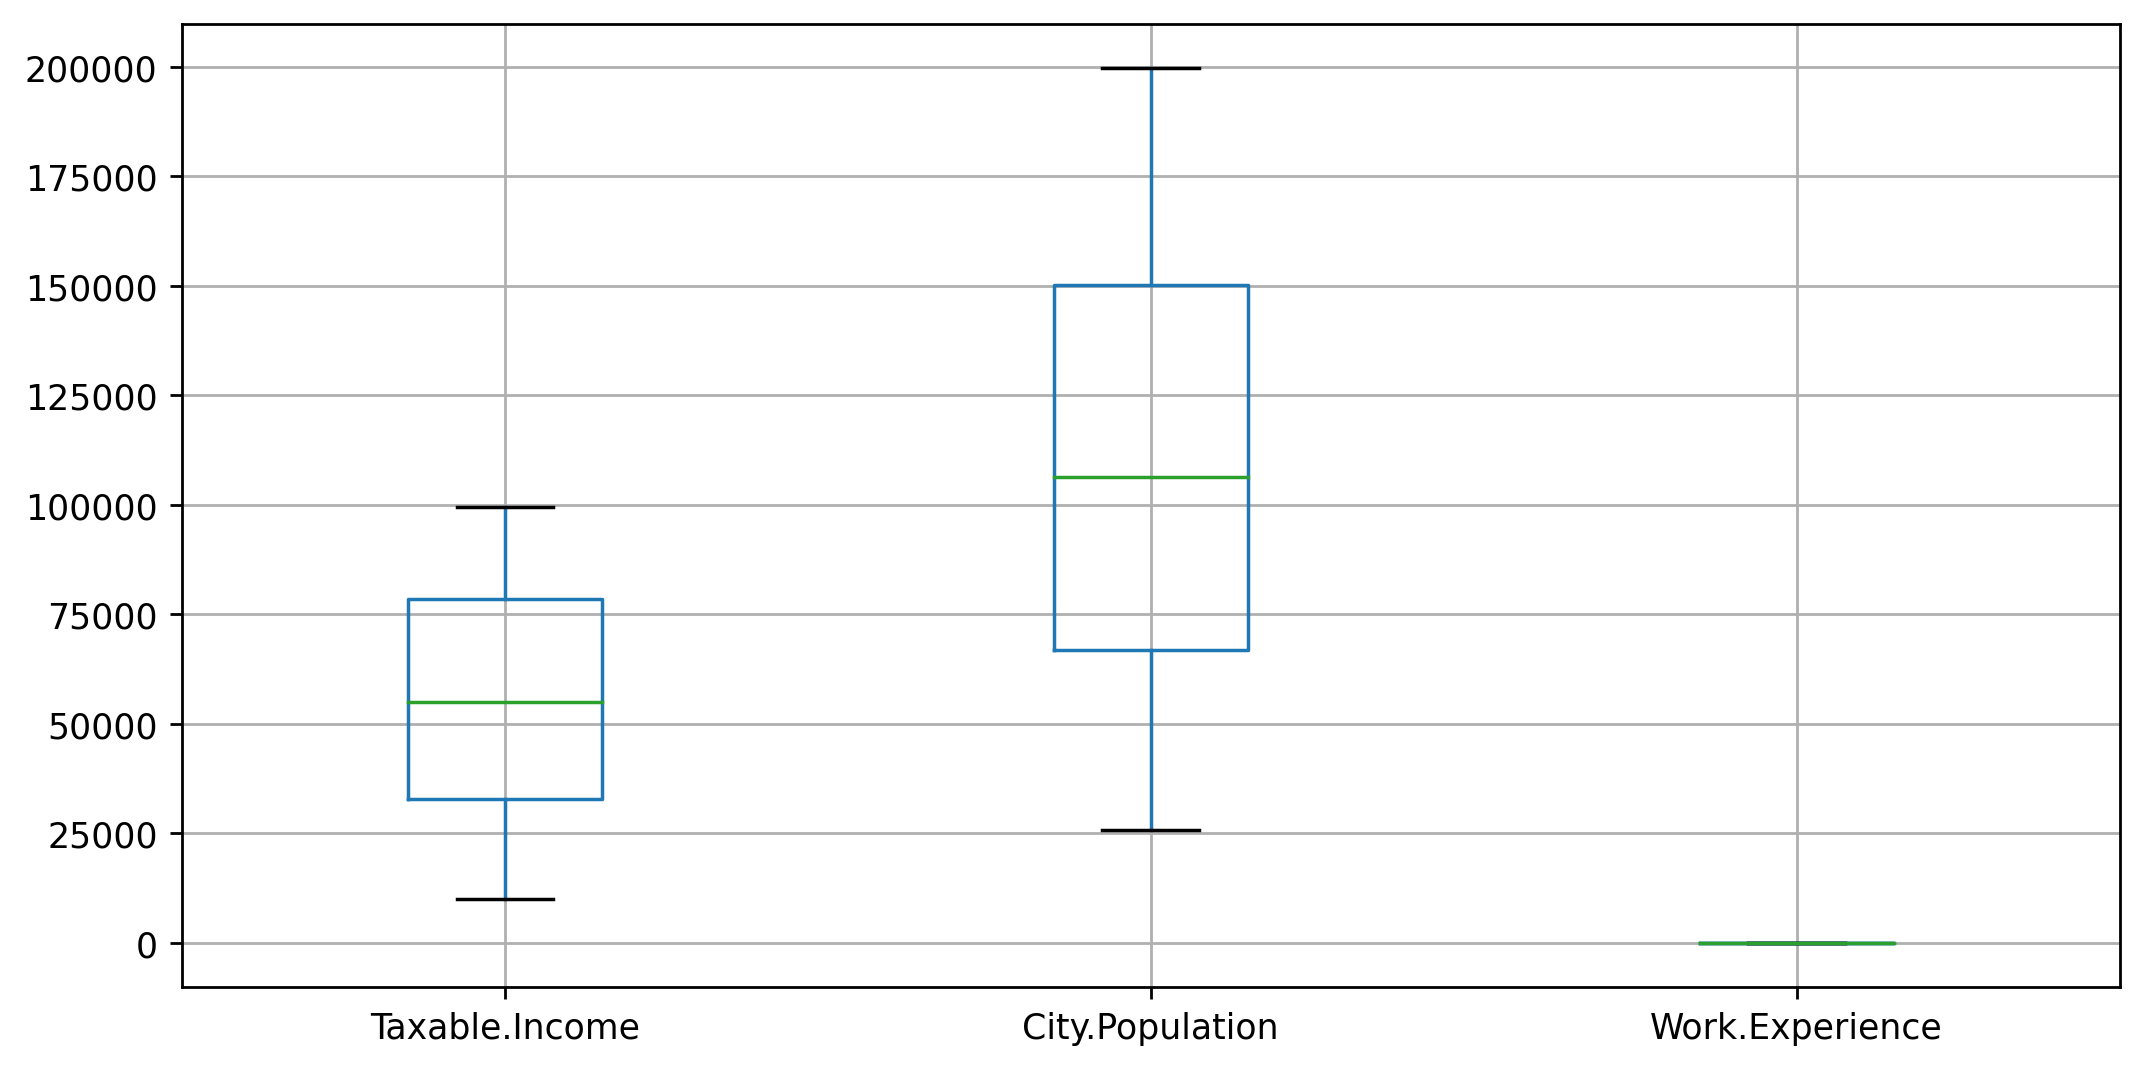

In [8]:
# Checking outliers from dataset

plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 250

df.boxplot()
plt.show()

In [9]:
# Checking skweness of data
df.skew()

Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


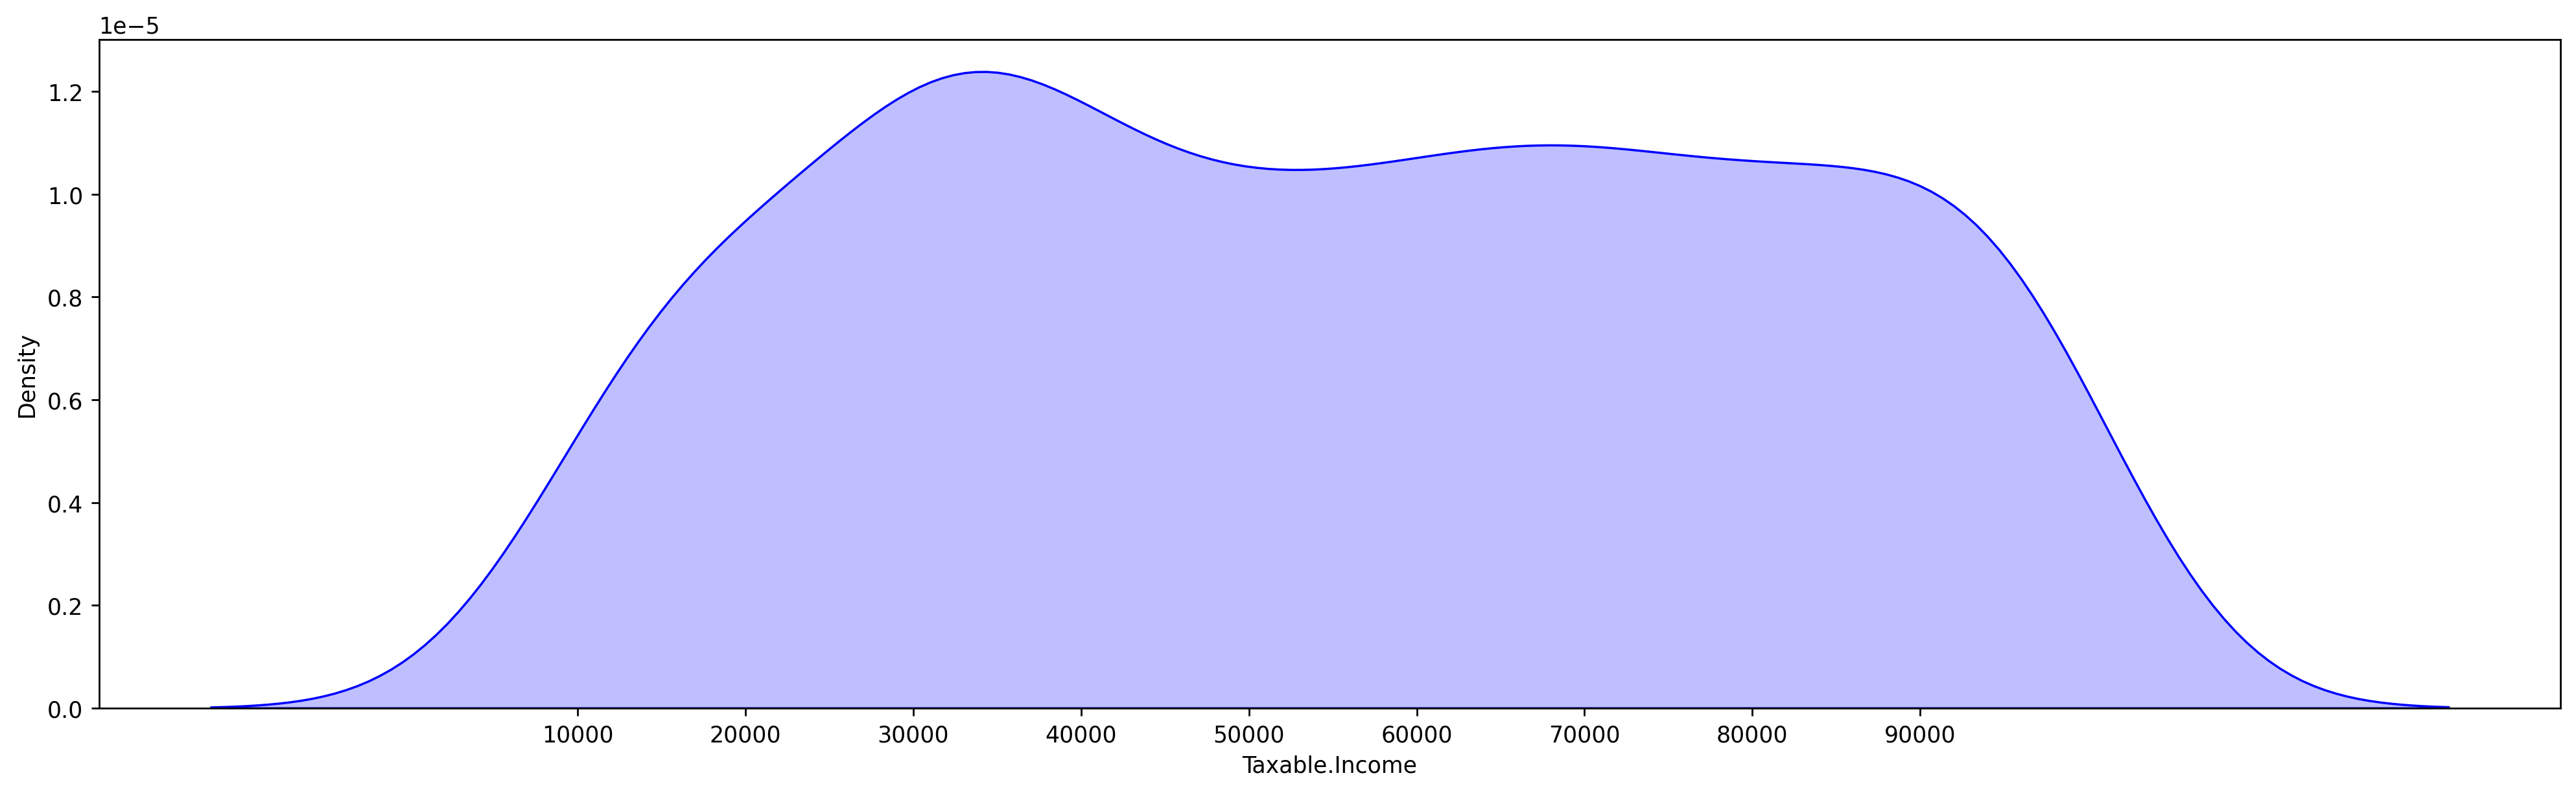

In [10]:
# Skewness & Kurtosis

plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='blue')
plt.xticks([i for i in range(10000,100000,10000)])
plt.tight_layout()
plt.show()

In [11]:
# Converting categorical variable into dummy/indicator variables.

df = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

<AxesSubplot: >

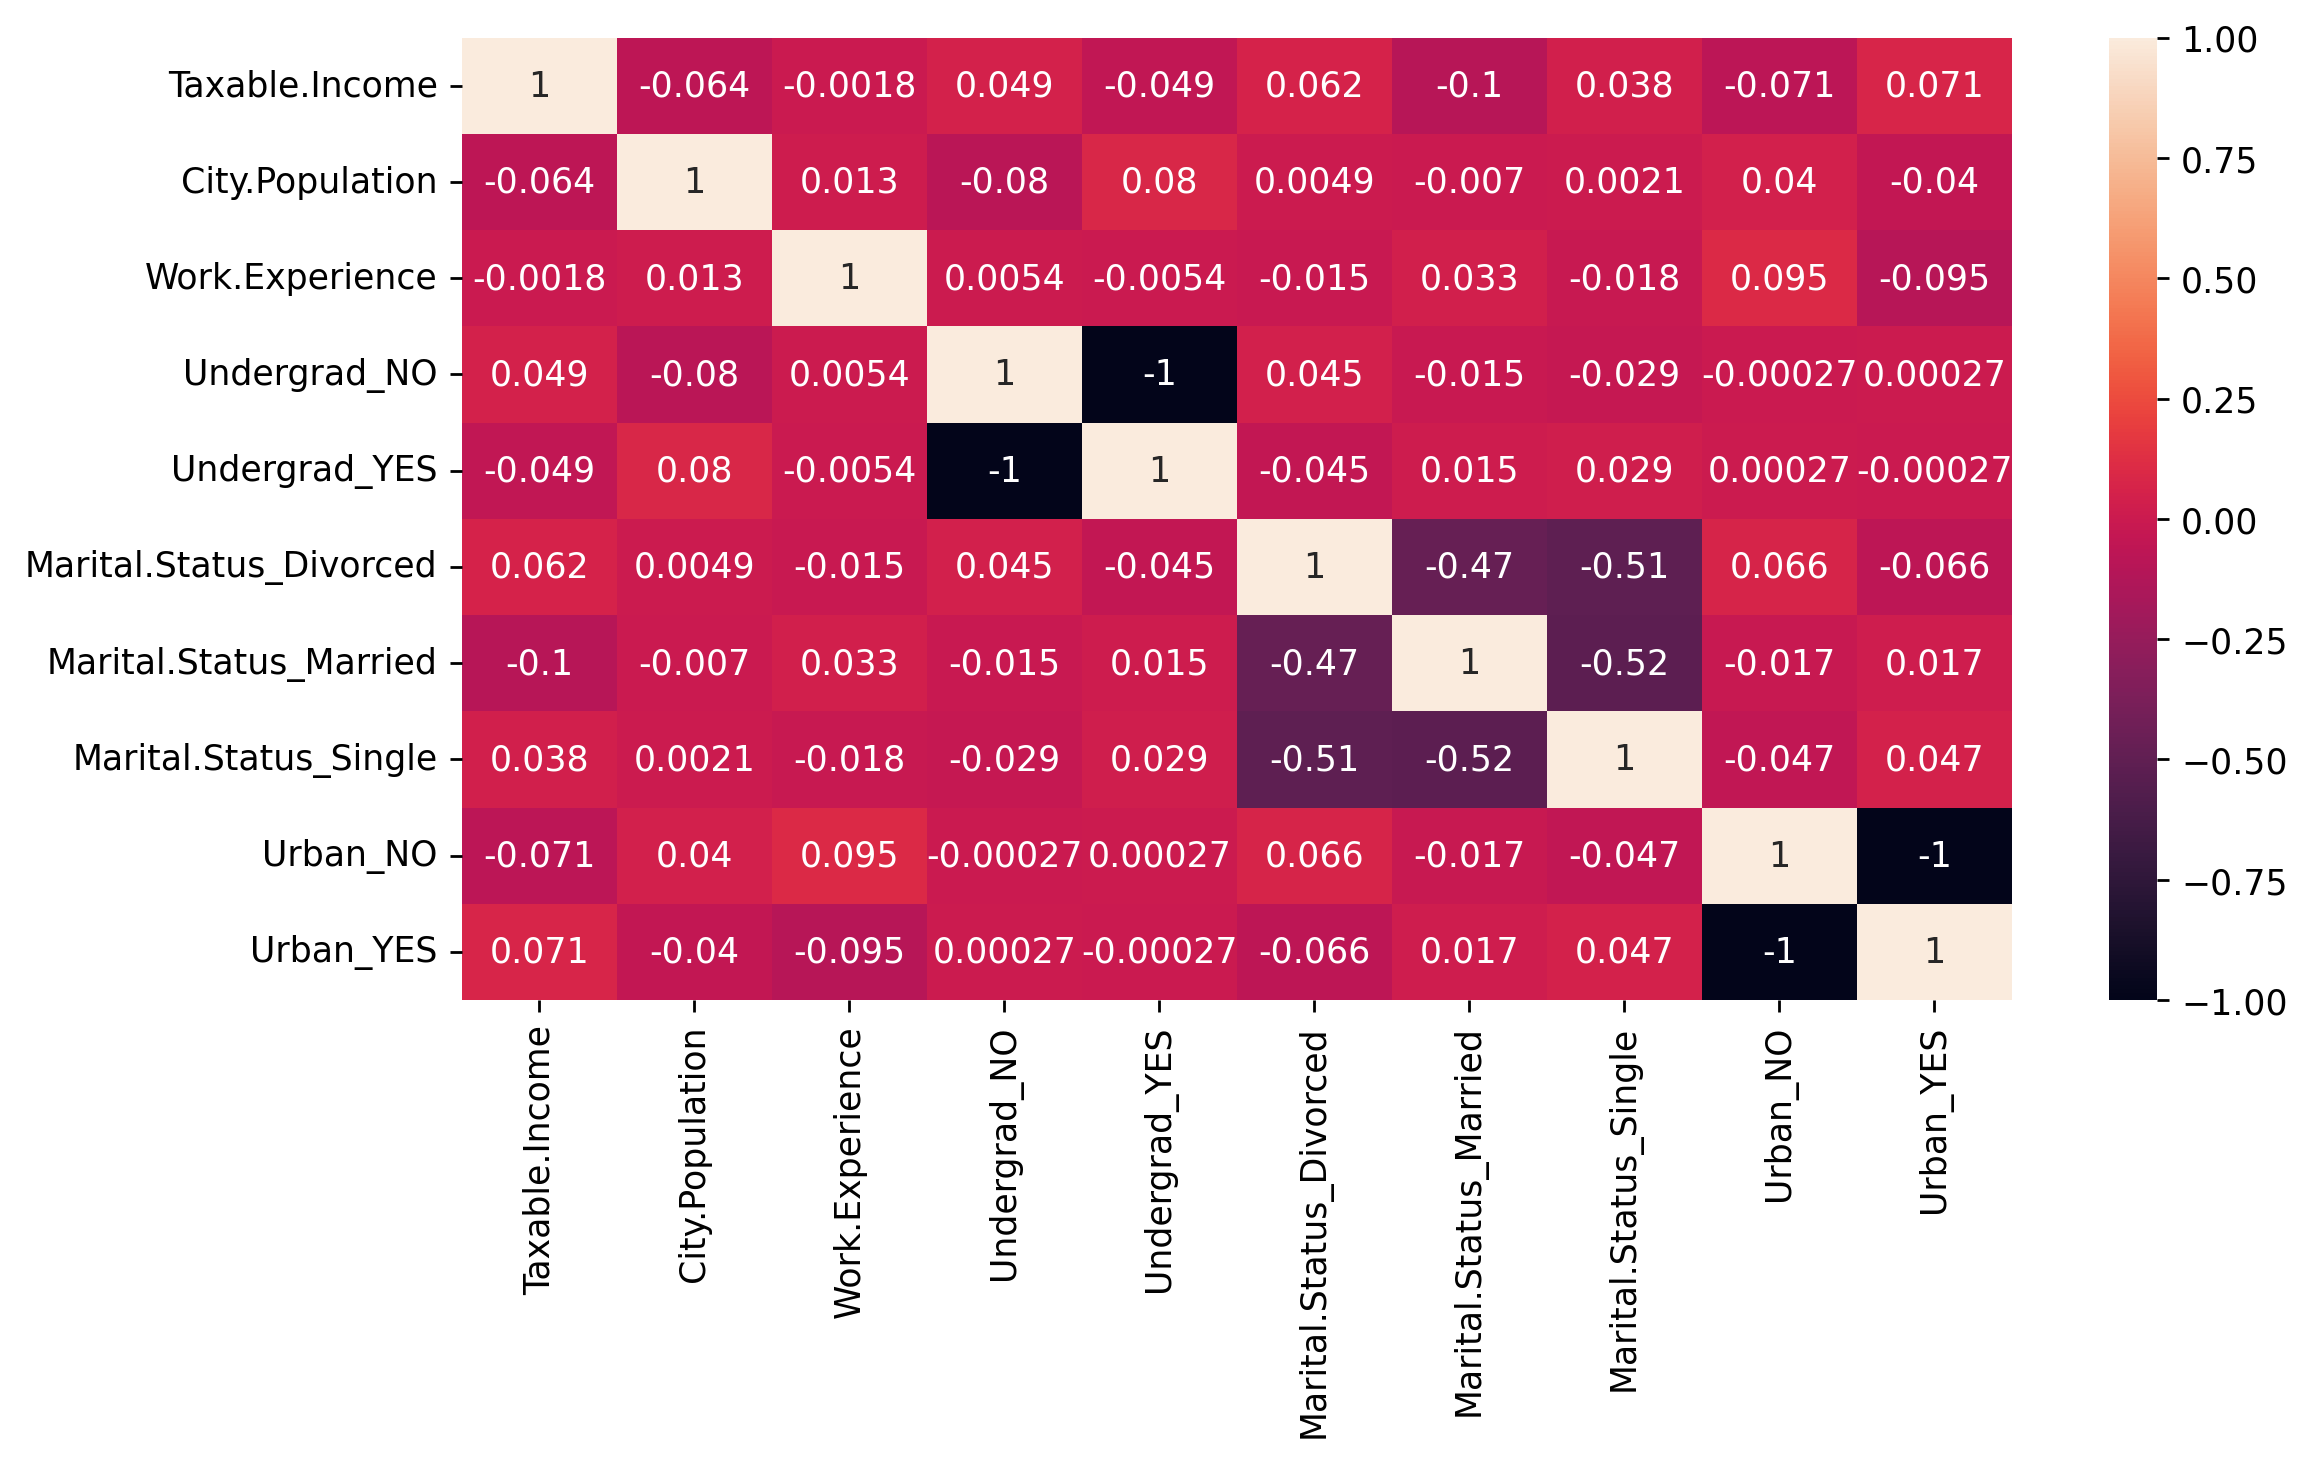

In [12]:
# After conversion checking correlation between columns

corr = df.corr()
sns.heatmap(corr, annot=True)

# Decision Tree :
- Target variable is continious, we create a class of taxable_income <= 30000 as "Risky" & others are "Good"

In [13]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

list(df.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [14]:
x = df.iloc[:,1:10] #Independent variable
y = df.iloc[:,0] #Dependent variable

In [15]:
# Splitting data into train & test sets

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
ytrain.value_counts()

good     379
risky    101
Name: Taxable.Income, dtype: int64

**Model building :**

In [17]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

# Prediction for xtest
ypred = dt.predict(xtest)
ypred

array(['good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky',
       'good', 'risky', 'risky', 'good', 'risky', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'risky',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'risky', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'risky',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'risky', 'risky', 'good',
       'risky', 'good', 'good', 'good', 'risky', 'good

In [18]:
confusion_matrix(ytest,ypred)

array([[67, 30],
       [18,  5]], dtype=int64)

In [19]:
print("Train Score :",dt.score(xtrain,ytrain))
print("Test Score :",dt.score(xtest,ytest))
print(classification_report(ytest,ypred))

Train Score : 1.0
Test Score : 0.6
              precision    recall  f1-score   support

        good       0.79      0.69      0.74        97
       risky       0.14      0.22      0.17        23

    accuracy                           0.60       120
   macro avg       0.47      0.45      0.45       120
weighted avg       0.66      0.60      0.63       120



***Hyperparameter Tunning :***

In [20]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
}

In [21]:
# search over specified parameter values for an estimator.

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params)

In [22]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [23]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [24]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='random')
dt.fit(xtrain,ytrain)

# Prediction for xtest
ypred = dt.predict(xtest)

In [25]:
print("Train Score :",dt.score(xtrain,ytrain))
print("Test Score :",dt.score(xtest,ytest))
print(classification_report(ytest,ypred))

Train Score : 0.7895833333333333
Test Score : 0.8083333333333333
              precision    recall  f1-score   support

        good       0.81      1.00      0.89        97
       risky       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



In [26]:
# Creating datframe for actual & predicted values

df_t = pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df_t

,Actual,Predicted
446,risky,good
404,good,good
509,risky,good
455,good,good
201,good,good
...,...,...
5,good,good
224,good,good
159,good,good
38,risky,good


In [27]:
cols = list(df.columns)

predictors = cols[1:10] #Independent
target = cols[0] #Dependent

In [28]:
dot_data = StringIO()

# Export a decision tree in DOT format
export_graphviz(dt, out_file = dot_data ,filled = True,rounded =True,
                feature_names = predictors,class_names = target, impurity = False)

In [29]:
# Load graph as defined by data in DOT format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('fraud_full.png')

True

***Conclusion :***
- The accuracy of the Training set is 100% we test the accurancy on the test data which is 69%

- In the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not

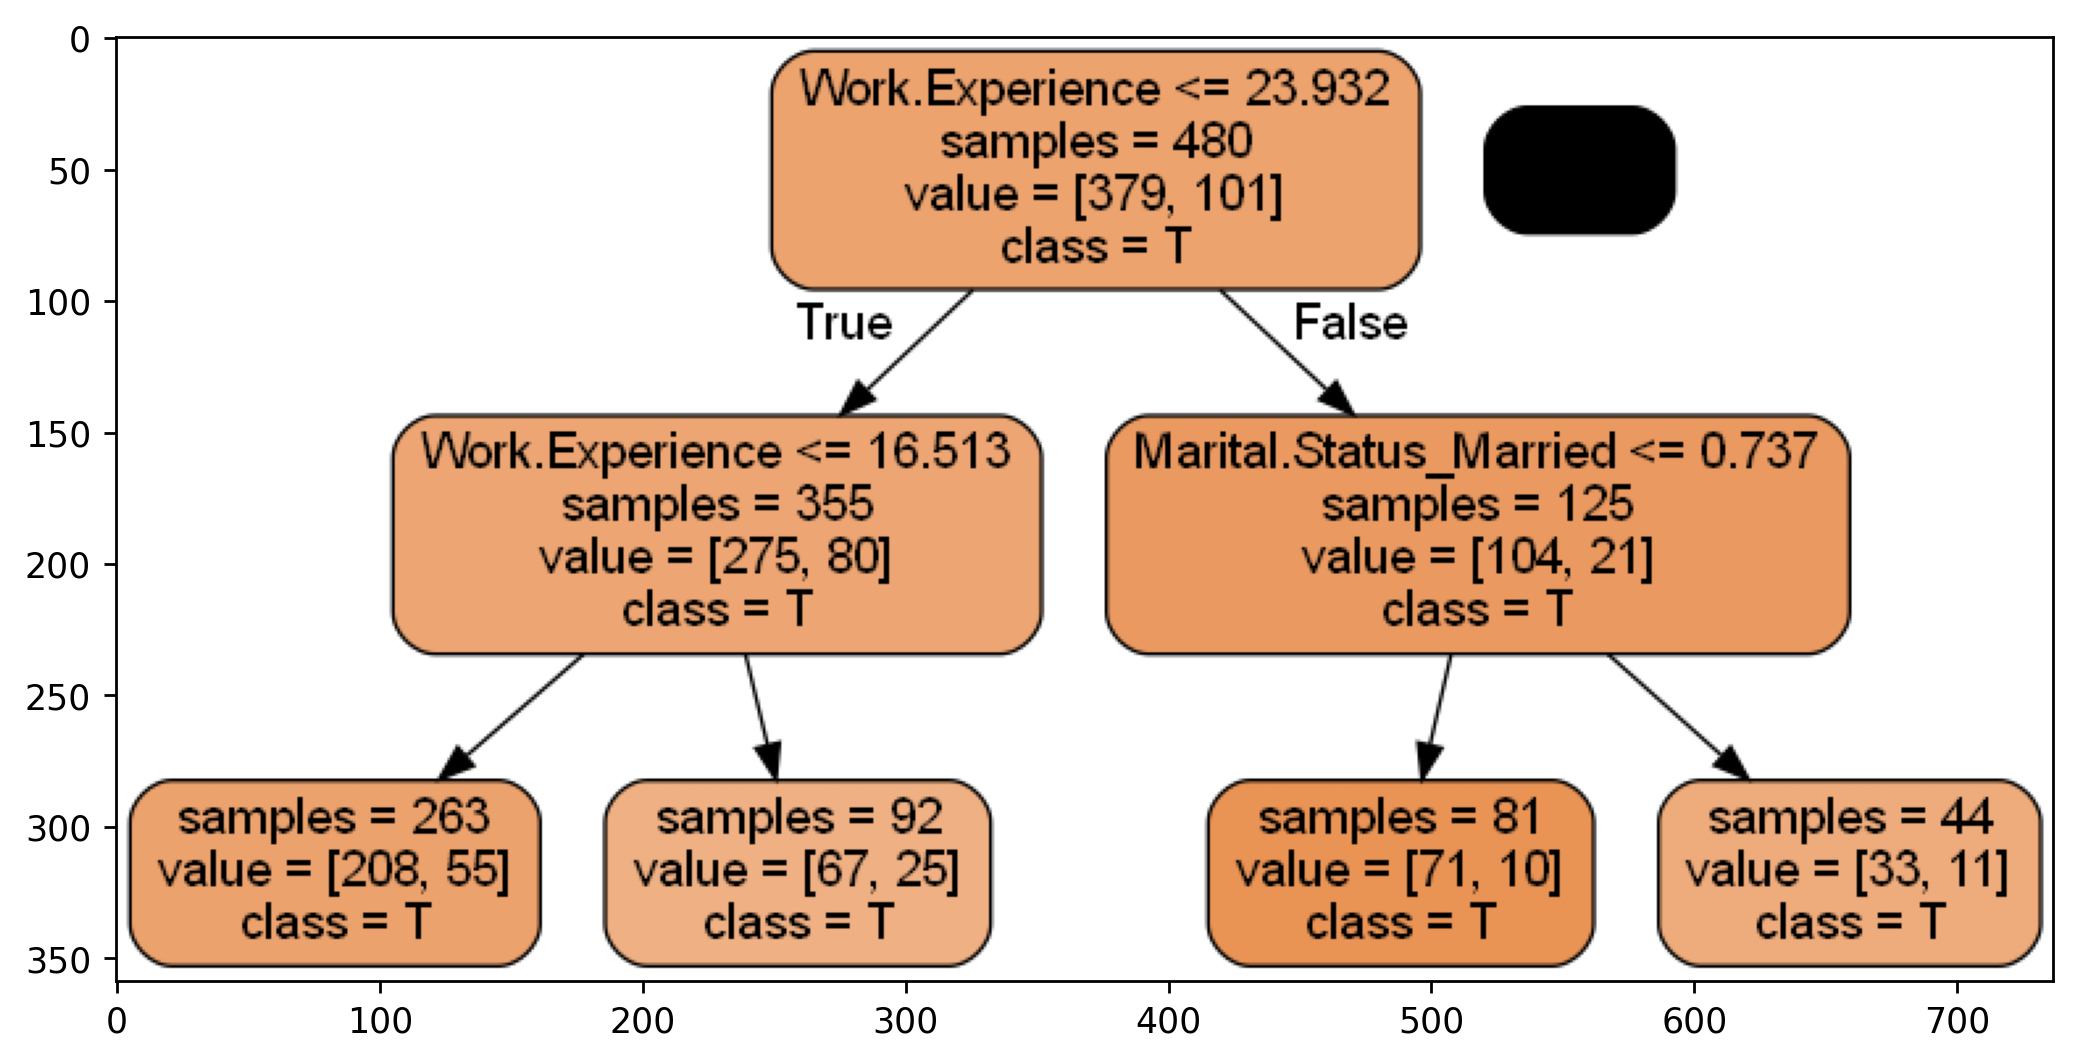

In [30]:
# Reading an image from a file into an array.
img = mpimg.imread('fraud_full.png') 

# Display data as an image
plt.imshow(img)

In [31]:
dt.feature_importances_

array([0.        , 0.55580902, 0.        , 0.        , 0.        ,
       0.44419098, 0.        , 0.        , 0.        ])

In [32]:
feature_importance = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': dt.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importance

,feature,importance
1,Work.Experience,0.555809
5,Marital.Status_Married,0.444191
0,City.Population,0.000000
2,Undergrad_NO,0.000000
3,Undergrad_YES,0.000000
4,Marital.Status_Divorced,0.000000
6,Marital.Status_Single,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000
